In [1]:
import pandas as pd

In [2]:
iris_df = pd.read_csv("Iris.csv", index_col = "Id")

In [3]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


iris_df.Species.value_counts()

In [4]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Handling data Normalization

### 1. Min-Max normalization

This method scales the data to a fixed range, typically between 0 and 1. 

Formula:

X_norm = (X - X_min)/ (X_max - X_min)

In [5]:
min_length = iris_df.SepalLengthCm.min()
max_length = iris_df.SepalLengthCm.max()

norm_length = (iris_df.SepalLengthCm - min_length) / (max_length - min_length)

In [6]:
norm_length.describe()

count    150.000000
mean       0.428704
std        0.230018
min        0.000000
25%        0.222222
50%        0.416667
75%        0.583333
max        1.000000
Name: SepalLengthCm, dtype: float64

In [7]:
# sklearn
from sklearn.preprocessing import MinMaxScaler

In [8]:
minmax_scale = MinMaxScaler()

norm_data = minmax_scale.fit_transform(iris_df[["SepalLengthCm",	"SepalWidthCm",	"PetalLengthCm",	"PetalWidthCm"]])


In [9]:
pd.DataFrame(norm_data, columns =["SepalLengthCm",	"SepalWidthCm",	"PetalLengthCm",	"PetalWidthCm"] ).describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


### 2. Z-score Normalization/ standardscaler

In [10]:
mean_length =  iris_df.SepalLengthCm.mean()
std_length =iris_df.SepalLengthCm.std()

In [11]:
norm_length = (iris_df.SepalLengthCm - mean_length)/ std_length
norm_length.describe()

count    1.500000e+02
mean    -5.684342e-16
std      1.000000e+00
min     -1.863780e+00
25%     -8.976739e-01
50%     -5.233076e-02
75%      6.722490e-01
max      2.483699e+00
Name: SepalLengthCm, dtype: float64

<Axes: ylabel='Density'>

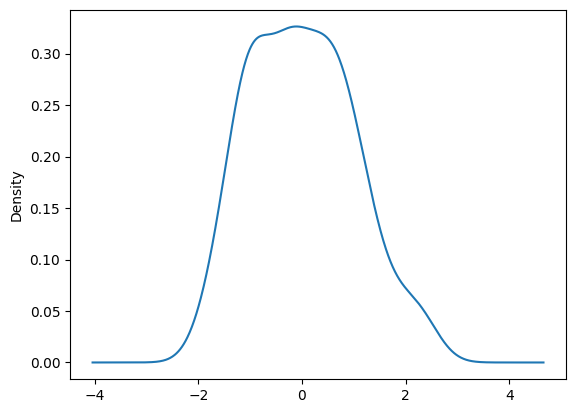

In [12]:
norm_length.plot.kde()

In [16]:
# sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
norm_data = scaler.fit_transform(iris_df[["SepalLengthCm",	"SepalWidthCm",	"PetalLengthCm",	"PetalWidthCm"]])

In [18]:
pd.DataFrame(norm_data, columns =["SepalLengthCm",	"SepalWidthCm",	"PetalLengthCm",	"PetalWidthCm"]).describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


## 3. Log Transformation

x_norm = log(x)

In [19]:
import numpy as np

In [21]:
#for n in range(0,10000,100):
    #print(np.log(n))

In [22]:
np.log(iris_df.SepalLengthCm).describe()

count    150.000000
mean       1.755393
std        0.141189
min        1.458615
25%        1.629241
50%        1.757858
75%        1.856298
max        2.066863
Name: SepalLengthCm, dtype: float64

## 4. Power Transformation


x_norm = sign(x) * abs(x) ** a

In [24]:
pow_factor = 0.8

In [25]:
norm_length = np.sign(iris_df.SepalLengthCm)* np.power(np.abs(iris_df.SepalLengthCm), pow_factor)

In [26]:
norm_length.describe()

count    150.000000
mean       4.098643
std        0.464265
min        3.211994
25%        3.681766
50%        4.080773
75%        4.415135
max        5.225185
Name: SepalLengthCm, dtype: float64